<a href="https://colab.research.google.com/github/RamadeviKN/Student-Performance-Analysis-Using-Machine-Learning/blob/main/Regression/student_performance_ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Student_Performance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]


## Encoding categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[0.0 1.0 7 99 9 1]
 [1.0 0.0 4 82 4 2]
 [0.0 1.0 8 51 7 2]
 ...
 [0.0 1.0 6 83 8 5]
 [0.0 1.0 9 97 7 0]
 [1.0 0.0 7 74 8 1]]


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [15]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
X_train
y_train

[[50.45128503 53.        ]
 [53.09379171 50.        ]
 [78.24502652 80.        ]
 ...
 [64.56863194 66.        ]
 [25.89718776 27.        ]
 [18.82598463 21.        ]]


array([83., 71., 43., ..., 54., 27., 76.])

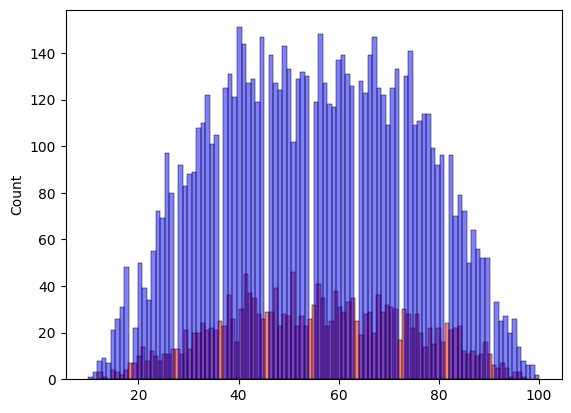

In [19]:
# Plot the predictions and the real values
import seaborn as sns
sns.histplot(y_pred.reshape(len(y_pred),1), color='red', alpha=0.5, bins=50)
sns.histplot(y_test.reshape(len(y_test),1), color='blue', alpha=0.5, bins=50)

## Evaluate the model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9880686410711422